# Introduction
## The introduction provides background information and sets the stage for the analysis. It typically includes a brief overview of the problem, the dataset used, and the main objectives of the analysis.

## In this Jupyter Notebook report, we analyze the Spotify and Billboard dataset to gain insights into the trends in song lyrics and music features over different decades. The primary goal is to understand the evolution of emotions conveyed in song lyrics and explore the relationship between lyrical content and music features with popularity.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#libraries used to extract, clean and manipulate the data
from helpers import *
import pandas as pd
import numpy as np
import string

#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')
%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sash/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Methods
# This section outlines the methodologies and techniques used in the analysis. It includes data preprocessing, feature engineering, and any specific algorithms or models applied.

### Data Extraction and Preprocessing
We utilized the pandas library to load and preprocess the Spotify and Billboard datasets. Date-related information was extracted from the 'WeekID' column to create a 'year' column.

In [21]:
billboard_data = pd.read_excel('../data/dataworld/Spotify_billboard.xlsx', index_col=0)
billboard_data.head(5)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,anticipation_normalized,fear,fear_normalized,surprise,surprise_normalized,emo_score,happy,happy_normalized,sorrow,sorrow_normalized
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,bill anderson,StillBill Anderson,1.0,17.0,11.0,8.0,...,0.020294,3.387,0.033206,1.516,0.014863,31.281,19.907,0.195167,11.374,0.111510
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,bobby vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0,...,0.005624,0.000,0.000000,0.000,0.000000,17.127,11.262,0.121097,5.865,0.063065
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,bay city rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0,...,0.005283,0.000,0.000000,0.438,0.003021,9.760,8.994,0.062028,0.766,0.005283
5,http://www.billboard.com/charts/hot-100/1987-0...,9/19/1987,11,Carrie,europe,CarrieEurope,1.0,17.0,11.0,8.0,...,0.058026,5.526,0.047231,5.625,0.048077,35.788,11.495,0.098248,24.293,0.207632
6,http://www.billboard.com/charts/hot-100/1987-1...,10/3/1987,11,Casanova,levert,CasanovaLevert,1.0,17.0,11.0,8.0,...,0.023054,1.242,0.007393,0.422,0.002512,40.625,30.756,0.183071,9.869,0.058744


In [22]:
billboard_data.columns

Index(['url', 'WeekID', 'Week Position', 'Song', 'Performer', 'SongID',
       'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart',
       'Lyrics', 'Artist', 'words', 'wordCount', 'languages', 'all_words',
       'allWordCount', 'year', 'decade', 'MTLD', 'TTR', 'CTTR',
       'sentimentScore', 'sentimentScore_pos', 'sentimentScore_neg',
       'emo_words', 'emoWordCount', 'joy', 'joy_normalized', 'sadness',
       'sadness_normalized', 'anger', 'anger_normalized', 'disgust',
       'disgust_normalized', 'trust', 'trust_normalized', 'anticipation',
       'anticipation_normalized', 'fear', 'fear_normalized', 'surprise',
       'surprise_normalized', 'emo_score', 'happy', 'happy_normalized',
       'sorrow', 'sorrow_normalized'],
      dtype='object')

### Decade Classification
A 'decade' column was created to group songs based on their release date into distinct decades (e.g., 50s, 60s, ... 20s).

In [23]:
import datetime
date = []
dates = billboard_data['WeekID'].tolist()
for i in range(0,len(dates)):
    date.append(datetime.datetime.strptime(dates[i], "%m/%d/%Y").year)

billboard_data['year'] = date

def create_decades(df):
    """
    This function creates a new column called decades used to group the songs and lyrics by decade based on the date released 
    for each song
    parameters:
    df = dataframe
    """
    decades = []

    for year in df['year']:
        if 1950 <= year < 1960:
            decades.append("50s")
        if 1960 <= year < 1970:
            decades.append("60s")
        if 1970 <= year < 1980:
            decades.append("70s")
        if 1980 <= year < 1990:
            decades.append("80s")
        if 1990 <= year < 2000:
            decades.append("90s")
        if 2000 <= year < 2010:
            decades.append("00s")
        if 2010 <= year < 2020:
            decades.append("10s")
        if 2020 <= year :
            decades.append("20s")
    df['decade'] = decades
    
    return df
create_decades(billboard_data)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,anticipation_normalized,fear,fear_normalized,surprise,surprise_normalized,emo_score,happy,happy_normalized,sorrow,sorrow_normalized
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,bill anderson,StillBill Anderson,1.0,17.0,11.0,8.0,...,0.020294,3.387,0.033206,1.516,0.014863,31.281,19.907,0.195167,11.374,0.111510
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,bobby vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0,...,0.005624,0.000,0.000000,0.000,0.000000,17.127,11.262,0.121097,5.865,0.063065
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,bay city rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0,...,0.005283,0.000,0.000000,0.438,0.003021,9.760,8.994,0.062028,0.766,0.005283
5,http://www.billboard.com/charts/hot-100/1987-0...,9/19/1987,11,Carrie,europe,CarrieEurope,1.0,17.0,11.0,8.0,...,0.058026,5.526,0.047231,5.625,0.048077,35.788,11.495,0.098248,24.293,0.207632
6,http://www.billboard.com/charts/hot-100/1987-1...,10/3/1987,11,Casanova,levert,CasanovaLevert,1.0,17.0,11.0,8.0,...,0.023054,1.242,0.007393,0.422,0.002512,40.625,30.756,0.183071,9.869,0.058744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325636,http://www.billboard.com/charts/hot-100/1985-0...,7/27/1985,82,You Look Marvelous,billy crystal,You Look MarvelousBilly Crystal,1.0,NaN,82.0,1.0,...,0.008592,4.212,0.015485,9.977,0.036680,65.506,52.148,0.191721,13.358,0.049110
325648,http://www.billboard.com/charts/hot-100/1963-0...,9/28/1963,70,You Lost The Sweetest Boy,mary wells,You Lost The Sweetest BoyMary Wells,1.0,NaN,70.0,1.0,...,0.032139,7.207,0.062670,1.915,0.016652,45.737,16.471,0.143226,29.266,0.254487
325657,http://www.billboard.com/charts/hot-100/1969-0...,8/2/1969,96,You Made A Believer (Out Of Me),ruby andrews,You Made A Believer (Out Of Me)Ruby Andrews,1.0,NaN,96.0,1.0,...,0.021875,0.000,0.000000,0.852,0.007607,42.419,37.528,0.335071,4.891,0.043670


In [24]:
# Basic analysis: Songs per year

df_hist = billboard_data.groupby(['year'])['SongID'].count().reset_index().rename(columns={'year':'Year','SongID' : 'SongCount'})
df_hist.head(2)

,Year,SongCount
0,1958,188
1,1959,299


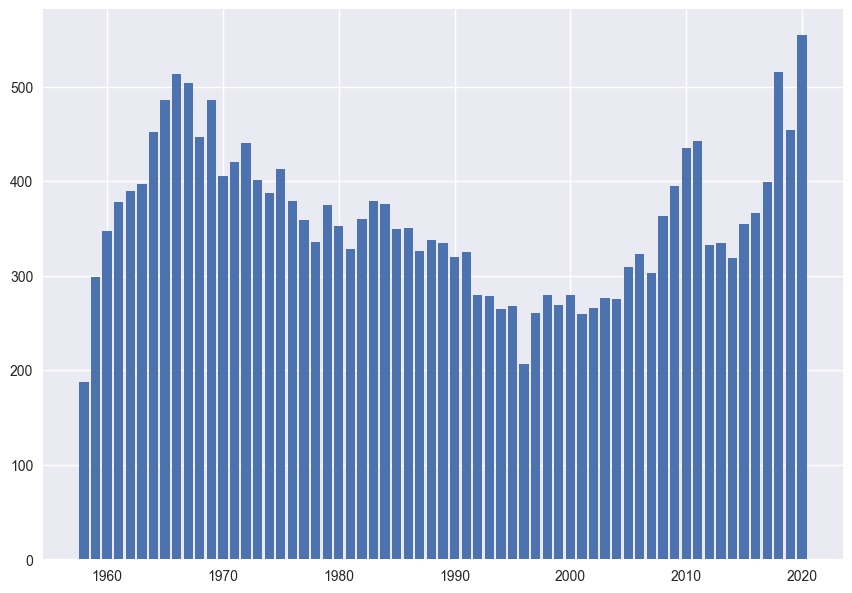

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
yrs = df_hist['Year'].tolist()
cnt = df_hist['SongCount']
ax.bar(yrs,cnt)
plt.savefig("histogram of song count"+".png", bbox_inches='tight')
plt.show()

In [26]:
df_affect = billboard_data.groupby(['decade'])['all_words'].apply(sum).reset_index()
df_affect

/var/folders/y9/pb7qmygd347dls81m0mvpj5r0000gn/T/ipykernel_13689/1619702675.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  df_affect = billboard_data.groupby(['decade'])['all_words'].apply(sum).reset_index()


,decade,all_words
0,00s,"['produce', 'scott', 'storch', 'juelz', 'santa..."
1,10s,"['say', 'oh', 'god', 'see', 'way', 'shine', 't..."
2,20s,"['im', 'like', 'water', 'ship', 'roll', 'night..."
3,50s,"['girl', 'change', 'bobby', 'sox', 'stocking',..."
4,60s,"['still', 'though', 'broke', 'heart', 'still',..."
5,70s,"['saturday', 'night', 'saturday', 'night', 'sa..."
6,80s,"['joey', 'tempest', 'light', 'go', 'see', 'rea..."
7,90s,"['puffy', 'like', 'right', 'yeah', 'bad', 'boy..."


### Emotion Analysis
Sentiment analysis to analyze positive and negative emotions in song lyrics. Emotion scores were aggregated by decade.

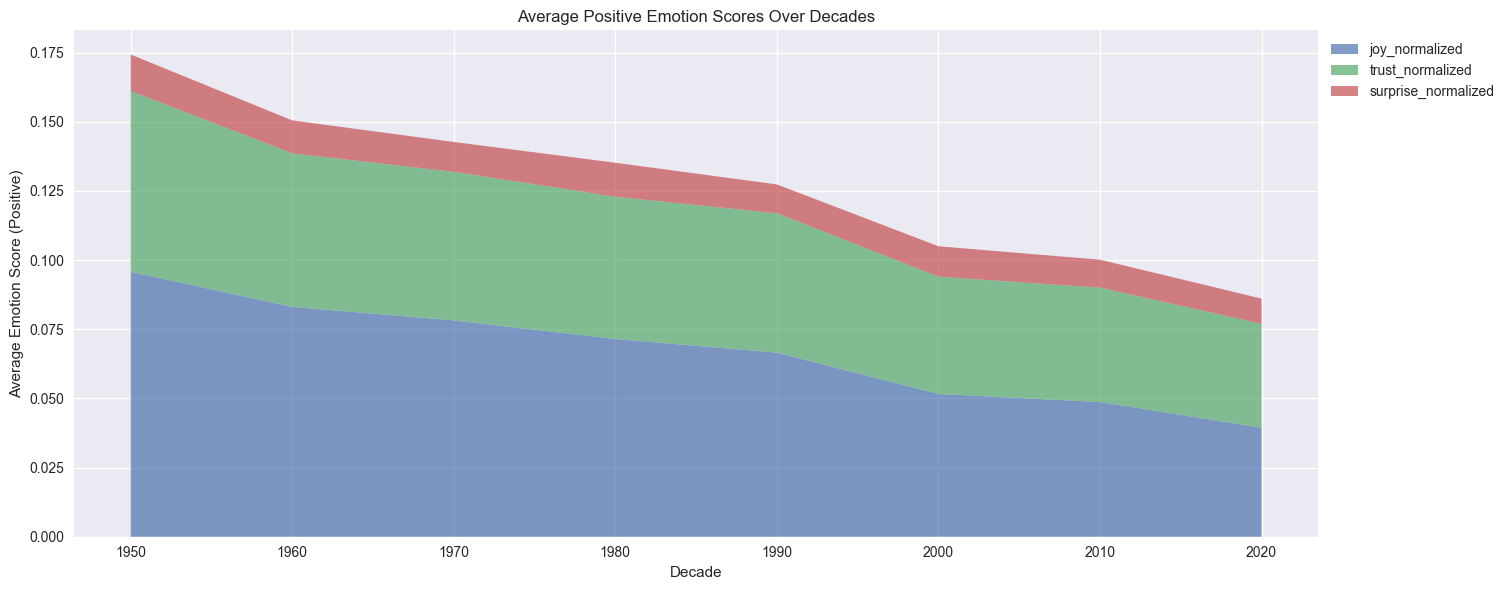

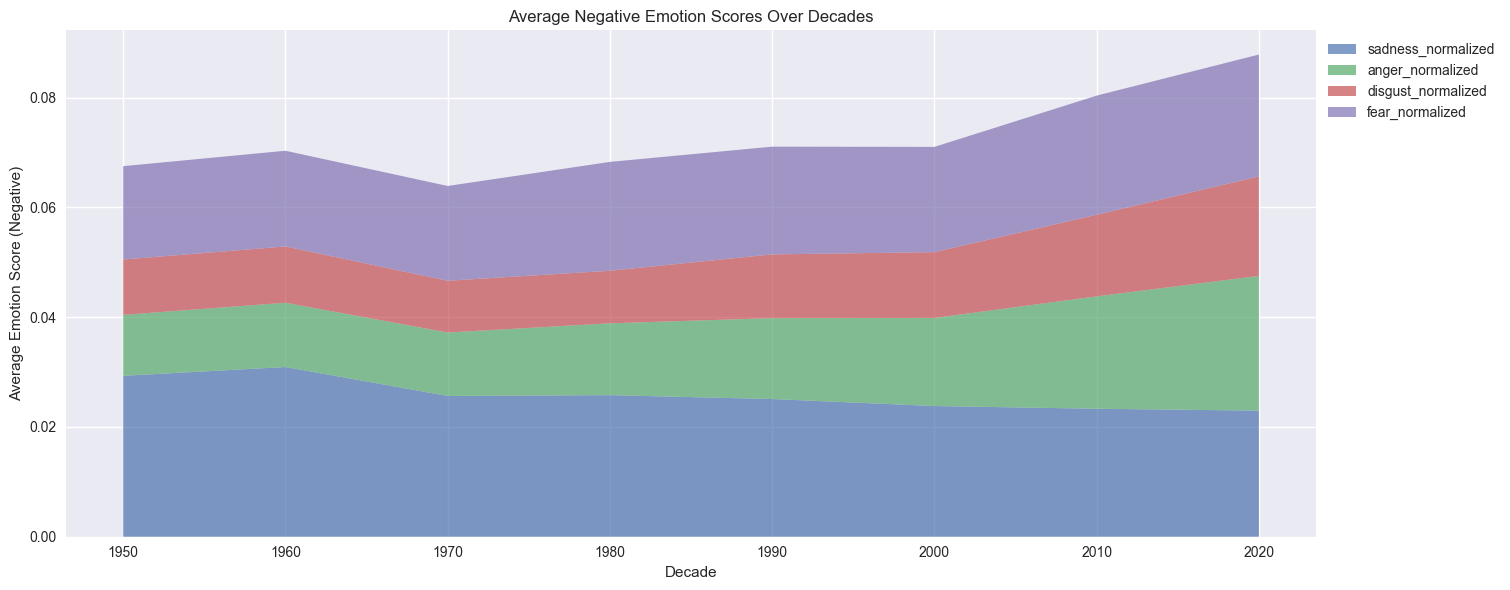

In [27]:
# Round the 'year' column to the nearest decade
billboard_data['decade'] = (billboard_data['year'] // 10) * 10

# Select the relevant columns for emotion scores
positive_emotions = ['joy_normalized', 'trust_normalized', 'surprise_normalized']
negative_emotions = ['sadness_normalized', 'anger_normalized', 'disgust_normalized', 'fear_normalized']

# Group by decade and calculate the mean emotion scores for each decade
decade_positive_emotions = billboard_data.groupby('decade')[positive_emotions].mean()
decade_negative_emotions = billboard_data.groupby('decade')[negative_emotions].mean()

# Plot area chart for positive emotions
plt.figure(figsize=(19, 6))
plt.stackplot(decade_positive_emotions.index, decade_positive_emotions.T, labels=positive_emotions, alpha=0.7)

# Customize the plot for positive emotions
plt.title('Average Positive Emotion Scores Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Emotion Score (Positive)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust the layout to leave space for the legend

# Show the plot for positive emotions
plt.savefig("Trend-positive-emotions"+".png", bbox_inches='tight')
plt.show()


# Plot area chart for negative emotions
plt.figure(figsize=(19, 6))
plt.stackplot(decade_negative_emotions.index, decade_negative_emotions.T, labels=negative_emotions, alpha=0.7)

# Customize the plot for negative emotions
plt.title('Average Negative Emotion Scores Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Emotion Score (Negative)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust the layout to leave space for the legend

# Show the plot for negative emotions
plt.savefig("Trend-negative-emotions"+".png", bbox_inches='tight')
plt.show()


very surprising is that all the positive emotions are trending downwards. That means the most popular songs have fewer and fewer words that convey these emotions as years have gone by.
It is evident that although they have been expressed in fewer quantities, the usage of negative emotion conveying words is increasing. Especially look at the emotion rivers of Fear, Anger, and Disgust. They start out so narrow and grow to be so large at the end. 

### Word Clouds
Word clouds were generated to visualize the most important words in song lyrics during the 1970s and 2010s.

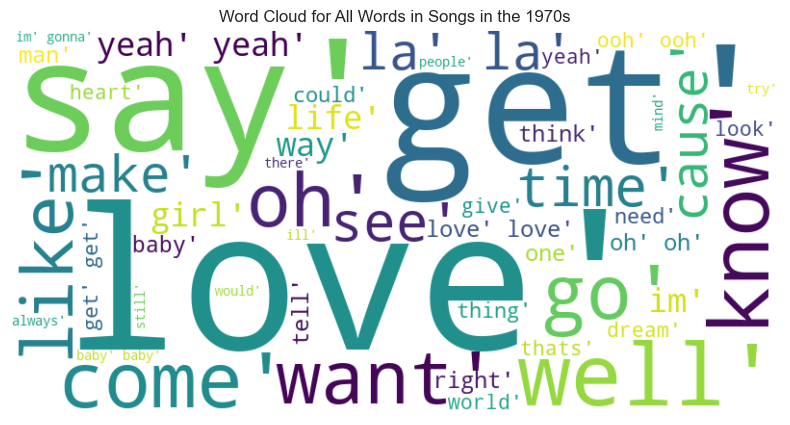

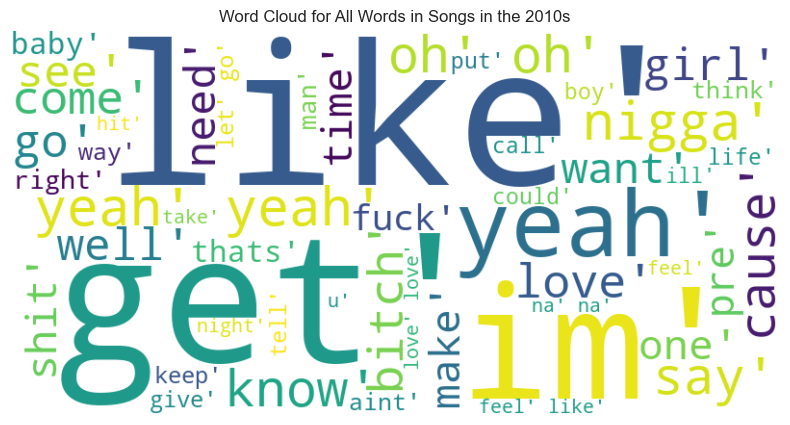

In [28]:
# Select data for the 70s and the 2010s
words_70s = billboard_data[billboard_data['decade'] == 1970]['all_words'].str.cat(sep=' ')
words_2010s = billboard_data[billboard_data['decade'] == 2010]['all_words'].str.cat(sep=' ')

# Function to create and display a minimalistic word cloud
def generate_minimal_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50,
                          colormap='viridis', contour_width=1, contour_color='black').generate(words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate minimalistic word clouds for the 70s and the 2010s
generate_minimal_wordcloud(words_70s, 'Word Cloud for All Words in Songs in the 1970s')
generate_minimal_wordcloud(words_2010s, 'Word Cloud for All Words in Songs in the 2010s')

The larger and brighter the word is, the more important it was in that decade. The importance of the word was calculated using tf-idf. As you can see, the most important words of the ’70s like love, know, say which are clearly positive words get overshadowed in the 2010s.

### Load Kaggle data

In [40]:
import pandas as pd
import glob

# Get a list of all CSV files in the specified directory with the naming pattern 'part_*'
csv_files = glob.glob('../data/kaggle/part_*.csv')

# Initialize an empty DataFrame to store the combined data
spotify_data = pd.DataFrame()

# Iterate through each CSV file and concatenate its data to the 'spotify_data' DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    spotify_data = pd.concat([spotify_data, df], ignore_index=True)

spotify_data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [41]:
spotify_data.shape

(586601, 20)

In [38]:
spotify_data.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [30]:
merged_data = pd.merge(billboard_data, spotify_data, how='inner', left_on=['Song'], right_on=['name'])
merged_data.shape

(86238, 68)

In [31]:
merged_data = merged_data.drop_duplicates(subset='SongID').reset_index(drop=True)
merged_data.head(5)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,bill anderson,StillBill Anderson,1.0,17.0,11.0,8.0,...,0,-6.847,1,0.0309,0.4490,0.000000,0.152,0.793,112.218,4
1,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,68,Still,commodores,StillCommodores,1.0,NaN,68.0,1.0,...,0,-6.847,1,0.0309,0.4490,0.000000,0.152,0.793,112.218,4
2,http://www.billboard.com/charts/hot-100/2010-0...,5/8/2010,91,Still,tim mcgraw,StillTim McGraw,1.0,NaN,91.0,1.0,...,0,-6.847,1,0.0309,0.4490,0.000000,0.152,0.793,112.218,4
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,bay city rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0,...,7,-9.585,1,0.0635,0.0931,0.000494,0.106,0.872,136.336,4
4,http://www.billboard.com/charts/hot-100/1987-0...,9/19/1987,11,Carrie,europe,CarrieEurope,1.0,17.0,11.0,8.0,...,7,-7.112,1,0.0264,0.1140,0.000002,0.358,0.139,136.482,4


### Feature Selection
Relevant features from both the Spotify and Billboard datasets were selected for further analysis.

In [32]:
# Select relevant features
selected_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'anticipation_normalized', 'fear_normalized', 'surprise_normalized', 'happy_normalized', 'sorrow_normalized']

# Keep only selected features
analysis_data = merged_data[selected_features + ['popularity']]

### Correlation Analysis
Correlation matrices and box plots were used to explore relationships between selected audio features and song popularity.

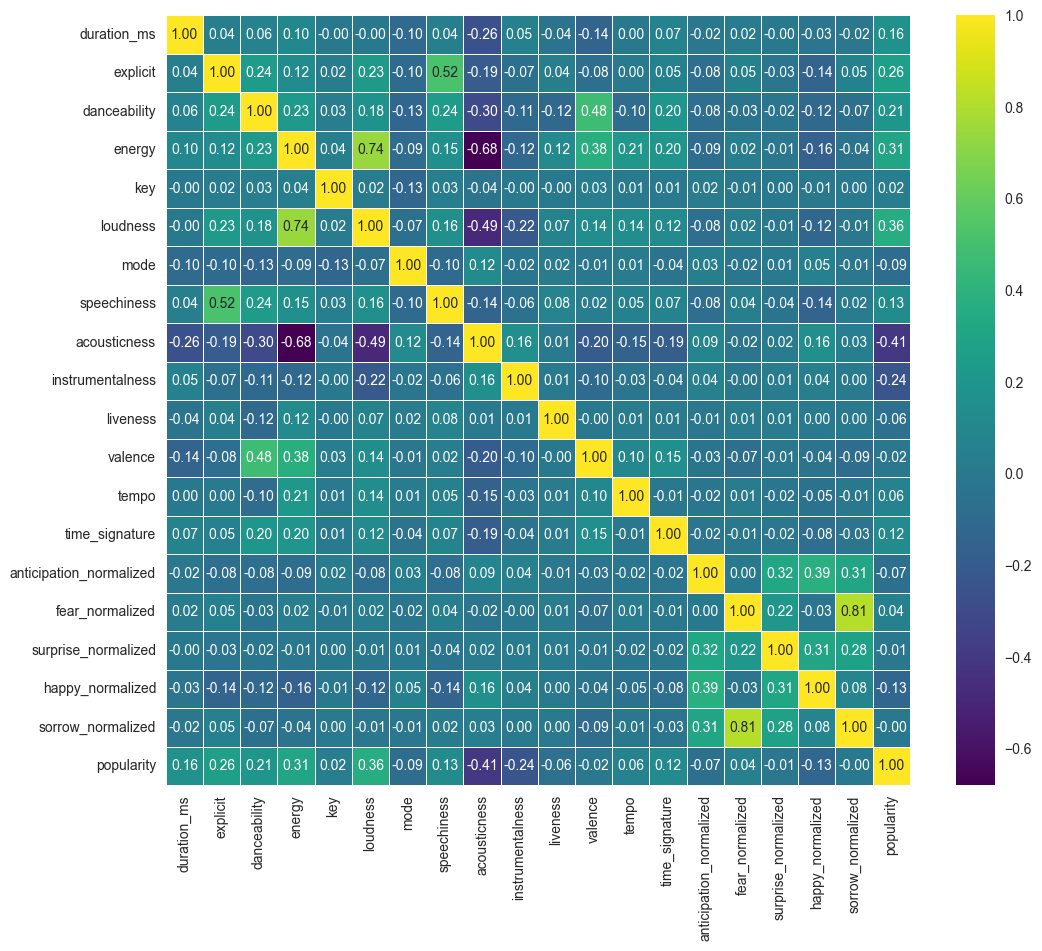

In [33]:
correlation_matrix = analysis_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.show()

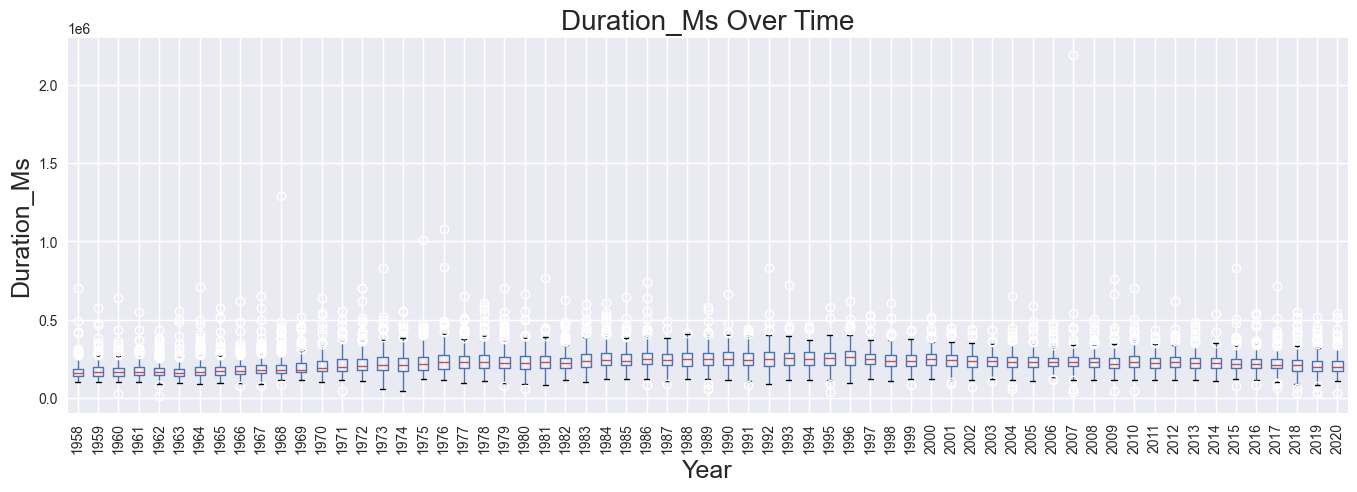

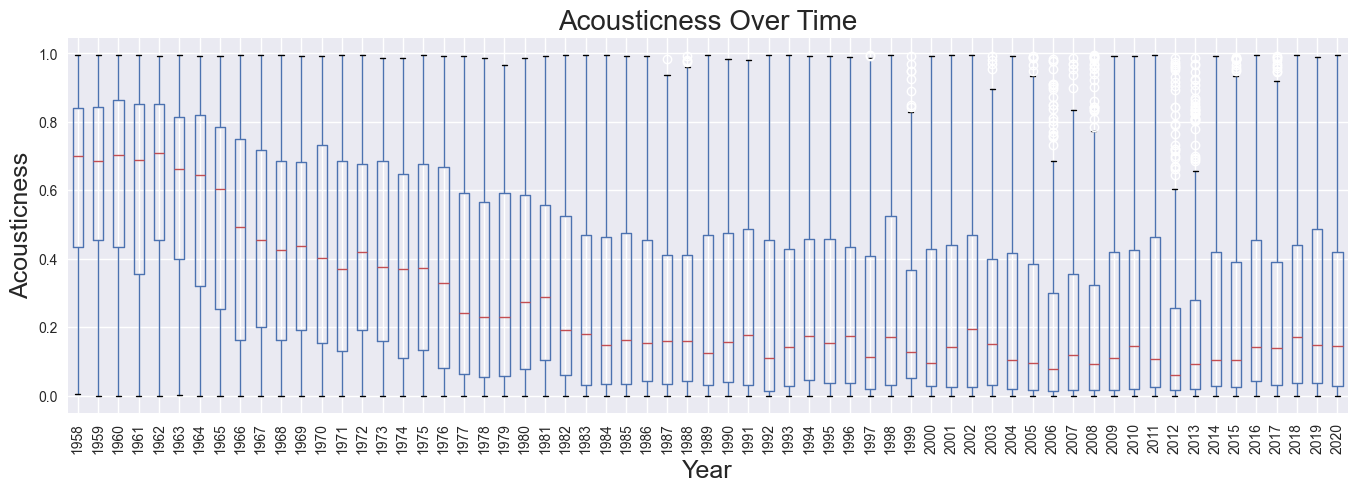

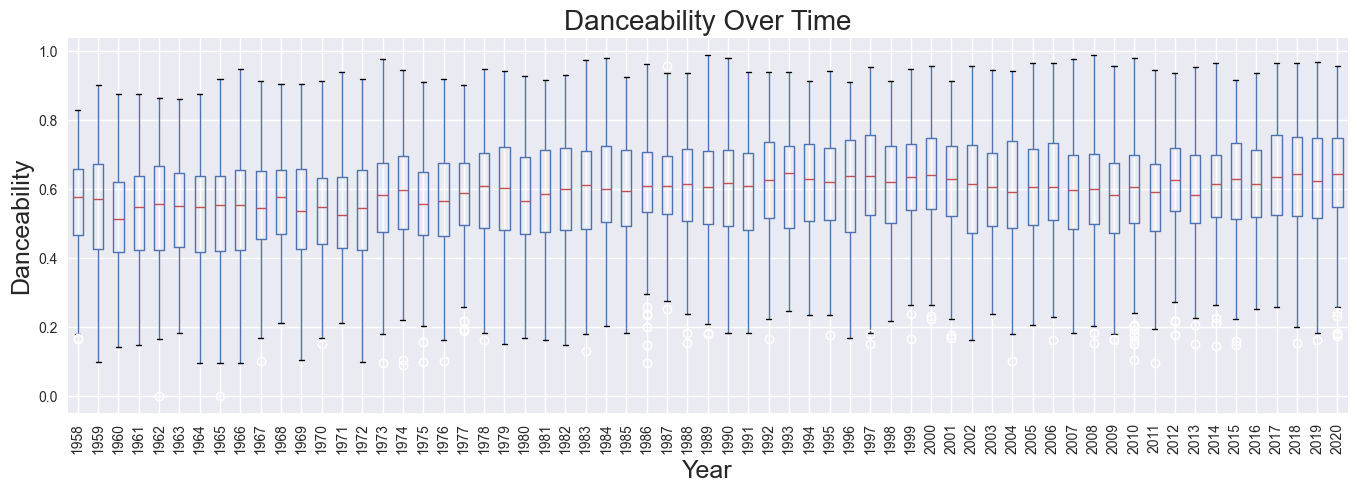

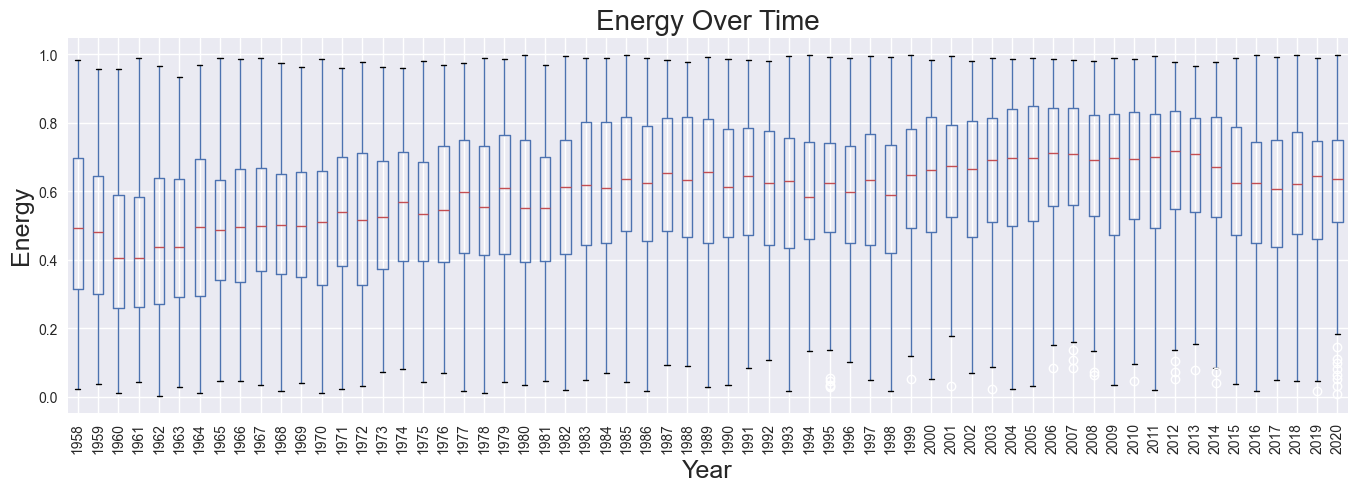

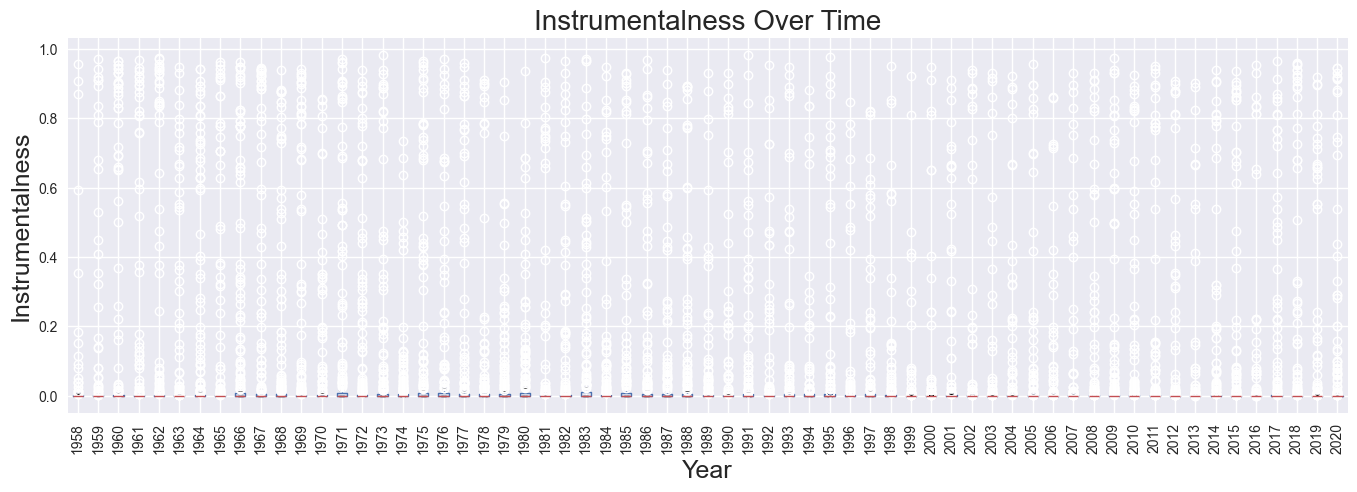

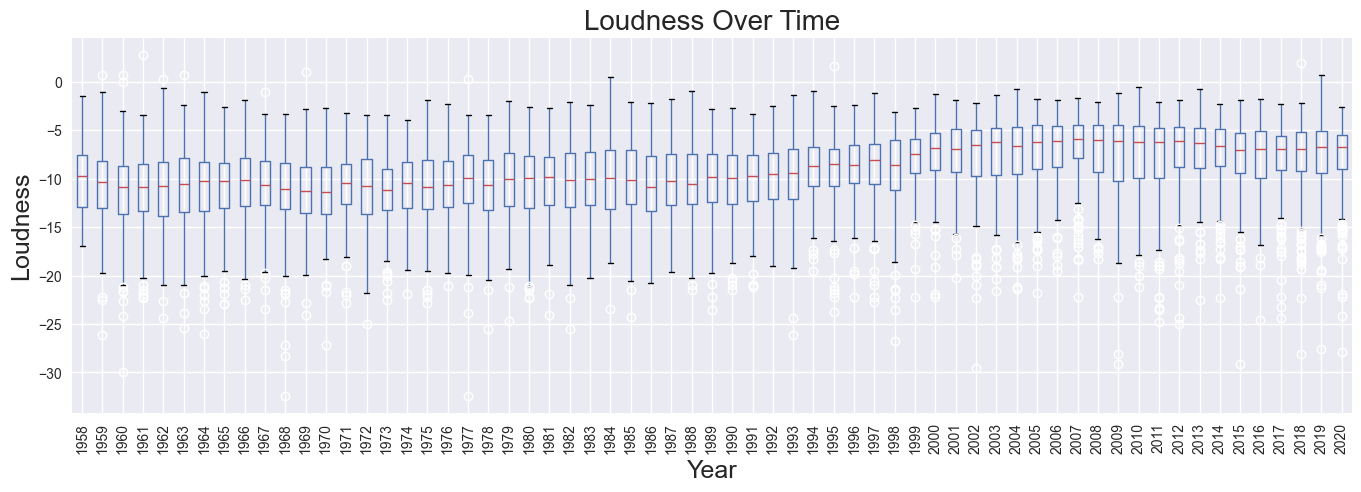

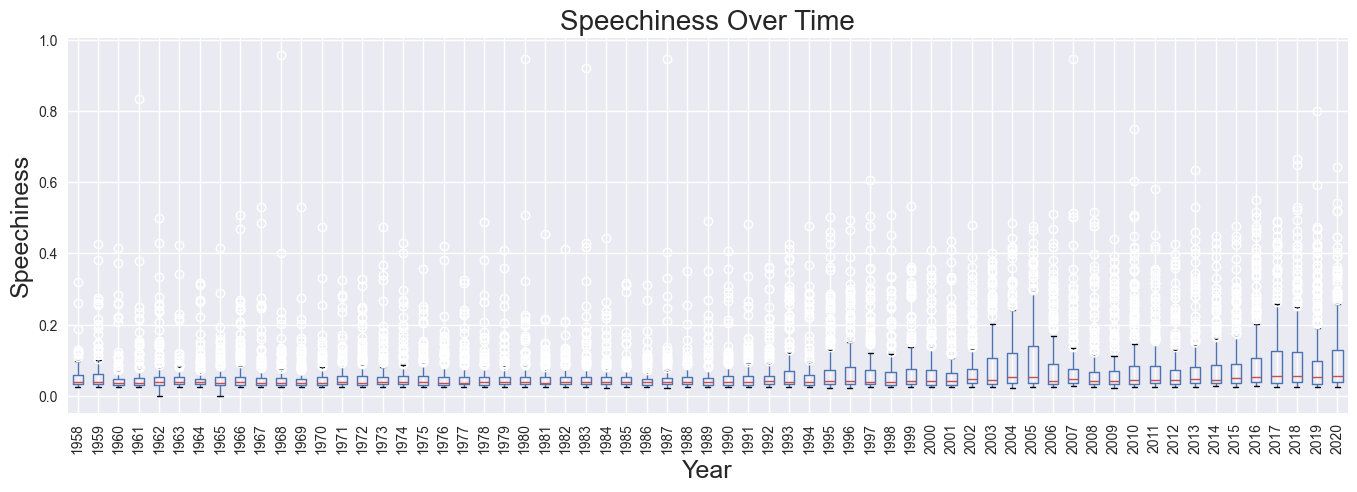

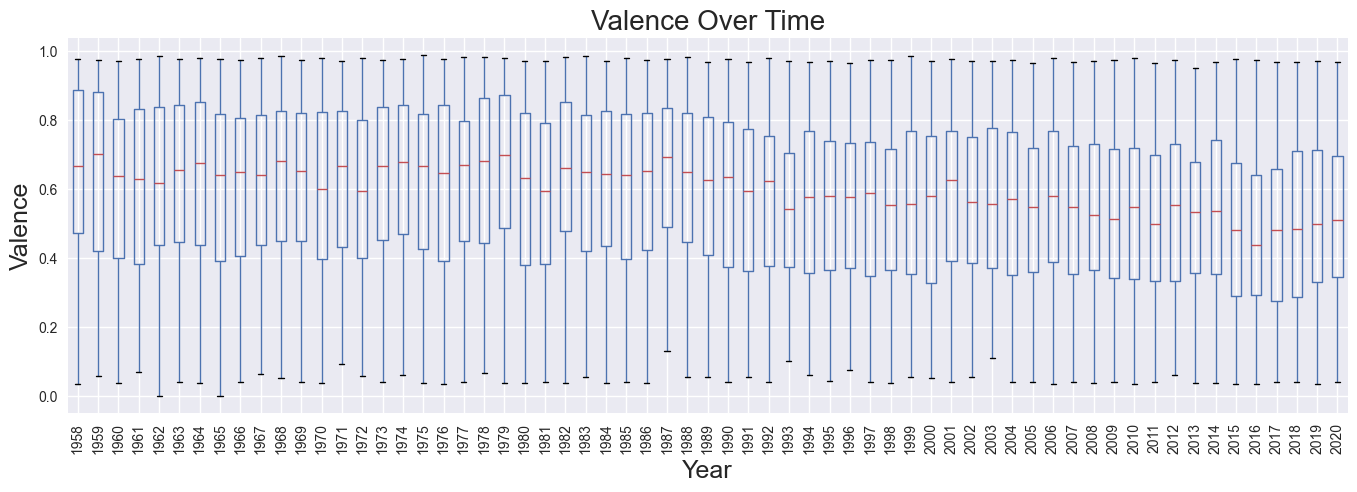

In [34]:
audio_features = ['duration_ms', 'acousticness', 'danceability', 'energy',
                  'instrumentalness', 'loudness', 'speechiness', 'valence']

for audio_feature in audio_features:
    ax = merged_data[['year', audio_feature]].boxplot(by='year', rot = 90,
                                             figsize=(16,5))
    
    
    ax.yaxis.grid(True)
    ax.set_xlabel('Year', fontsize=18)
    ax.set_ylabel(audio_feature, fontsize=18)
    title = audio_feature.title() + ' Over Time'
    ax.set(ylabel=audio_feature.title())
    ax.set_title(title, fontsize=20)
    if audio_feature == 'duration_min':
        ax.set(ylim=(0,12))
        ax.set(ylabel='Duration (minutes)')
        ax.set_title('Song Duration Over Time', fontsize=20)
    if audio_feature == 'uniq_ratio':
        ax.set(ylim=(0,12))
        ax.set(ylabel='Ratio of Total to Unique Words')
        ax.set_title('Lyric Repetitiveness Over Time', fontsize=20)
    plt.suptitle('')

### Models
Linear Regression, Ridge Regression, Random Forest, and Gradient Boosting models were implemented to predict song popularity based on selected features. An autoencoder was also utilized for dimensionality reduction.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV



# Split the data into training and testing sets
X = analysis_data.drop('popularity', axis=1)
y = analysis_data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.1, 1.0, 10.0]  # Example alpha values, you can adjust these
ridge_model = RidgeCV(alphas=alphas, cv=5)  # Cross-validated Ridge regression
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')


Ridge Regression Mean Squared Error: 297.1418382438426


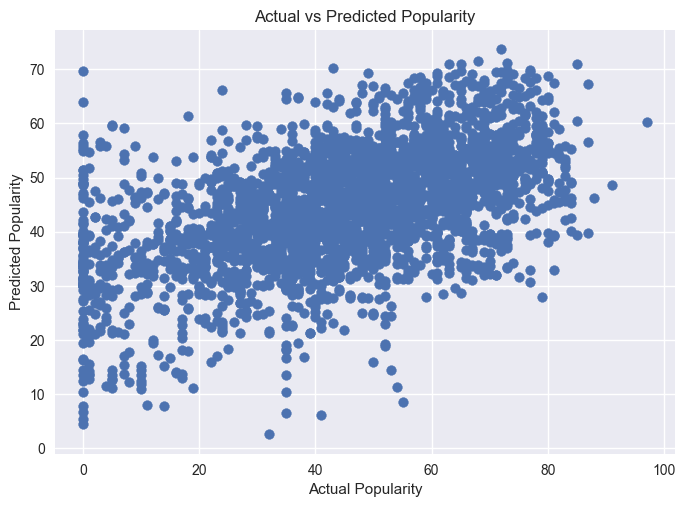

In [36]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

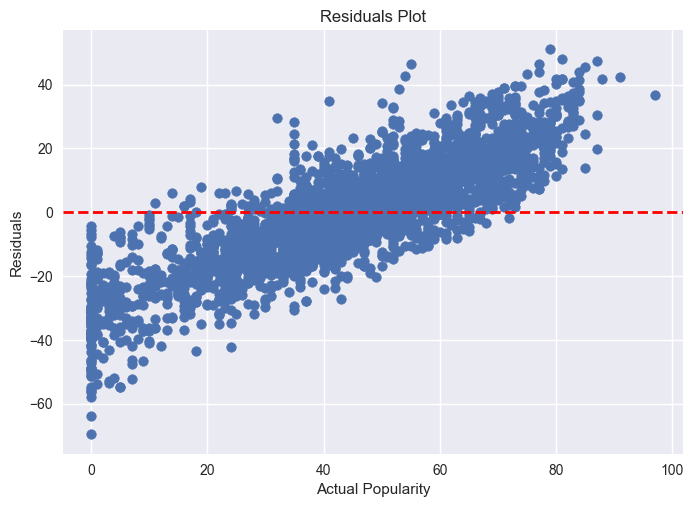

In [37]:
residuals = y_test - y_pred_ridge
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Example using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 204.19695642401877


In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the autoencoder model
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on your data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=0)

# Use the encoder part for dimensionality reduction
encoder = Model(input_layer, encoded)

# Transform the input features using the trained autoencoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Now, use the encoded features to train a linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Autoencoder + Linear Regression Mean Squared Error: {mse}')


2024-01-07 21:14:02.875658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


94/94 [==============================] - 0s 838us/step
Autoencoder + Linear Regression Mean Squared Error: 304.5673272557429


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions on the test set using the best model
best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the model
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
print(f'Best Gradient Boosting Mean Squared Error: {mse_best_gb}')

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Best Gradient Boosting Mean Squared Error: 242.30755117280606


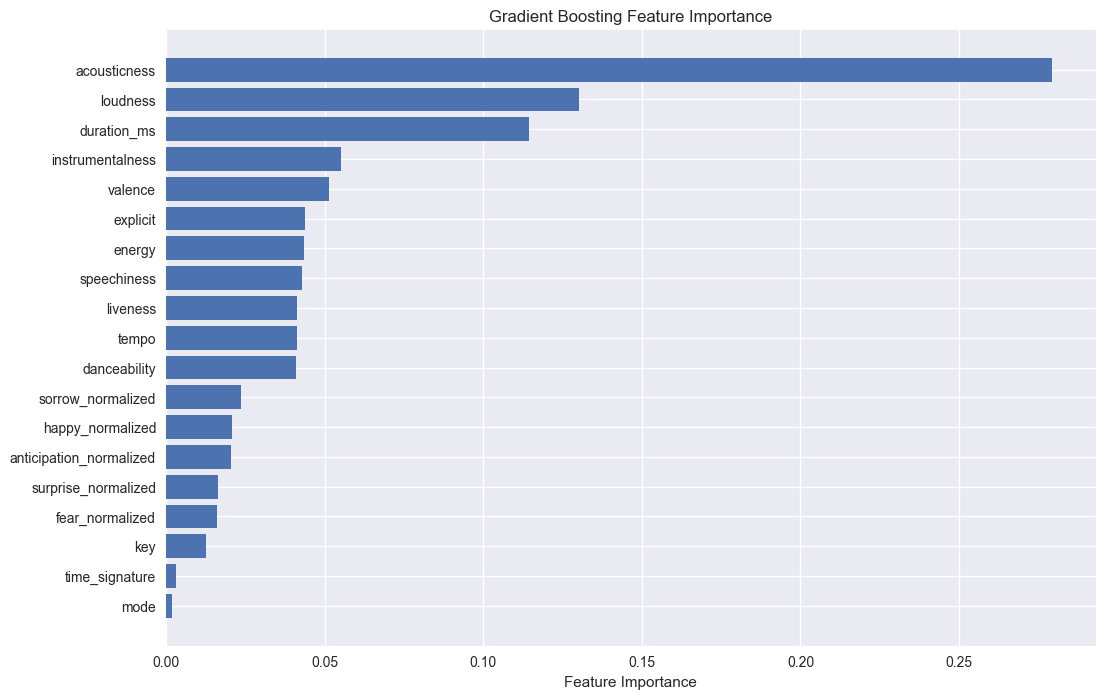

In [41]:
feature_importance = best_gb_model.feature_importances_
feature_names = X.columns

# Sort features based on importance
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance')
plt.show()

In [42]:
analysis_data.drop(['key', 'time_signature', 'mode'], axis=1)
analysis_data

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,anticipation_normalized,fear_normalized,surprise_normalized,happy_normalized,sorrow_normalized,popularity
0,139680,0,0.478,0.637,0,-6.847,1,0.0309,0.4490,0.000000,0.1520,0.793,112.218,4,0.020294,0.033206,0.014863,0.195167,0.111510,37
1,139680,0,0.478,0.637,0,-6.847,1,0.0309,0.4490,0.000000,0.1520,0.793,112.218,4,0.011769,0.018725,0.020945,0.132802,0.083275,37
2,139680,0,0.478,0.637,0,-6.847,1,0.0309,0.4490,0.000000,0.1520,0.793,112.218,4,0.028325,0.013481,0.011974,0.090571,0.064351,37
3,174467,0,0.508,0.691,7,-9.585,1,0.0635,0.0931,0.000494,0.1060,0.872,136.336,4,0.005283,0.000000,0.003021,0.062028,0.005283,49
4,272133,0,0.455,0.487,7,-7.112,1,0.0264,0.1140,0.000002,0.3580,0.139,136.482,4,0.058026,0.047231,0.048077,0.098248,0.207632,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,300440,0,0.742,0.593,1,-12.737,1,0.0704,0.1490,0.000003,0.0249,0.860,89.826,4,0.027760,0.002376,0.014304,0.171272,0.030824,37
14897,168040,0,0.753,0.870,7,-10.007,0,0.0528,0.1420,0.000000,0.1010,0.925,127.230,4,0.006458,0.007157,0.000000,0.104807,0.022277,28
14898,227733,0,0.653,0.865,7,-6.395,1,0.0325,0.0075,0.000001,0.0629,0.828,116.966,4,0.030795,0.000000,0.023179,0.138402,0.030795,51
14899,168467,0,0.637,0.724,0,-7.082,0,0.0455,0.1130,0.000000,0.0895,0.837,124.096,4,0.000000,0.000000,0.000000,0.366037,0.013315,5


In [43]:
X = analysis_data.drop('popularity', axis=1)
y = analysis_data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.1, 1.0, 10.0]  # Example alpha values, you can adjust these
ridge_model = RidgeCV(alphas=alphas, cv=5)  # Cross-validated Ridge regression
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')


Ridge Regression Mean Squared Error: 297.1418382438426


# Results
This section presents the main findings and outcomes of the analysis. It includes visualizations, key trends, and insights obtained from the data.

### Decade-wise Analysis
A histogram was plotted to show the distribution of songs per year. Emotion trends over decades were visualized using area charts.

### Positive and Negative Emotions
Area charts displayed the average positive and negative emotion scores over decades, revealing interesting trends in lyrical content.

### Word Clouds Comparison
Word clouds highlighted the shift in important words from the 1970s to the 2010s, indicating changes in lyrical themes.

### Correlation Analysis
Heatmaps illustrated the correlation between audio features and song popularity, providing insights into the impact of musical characteristics.

### Machine Learning and Deep Learning Model Performance
Mean Squared Error was calculated for Ridge Regression, Random Forest, and Gradient Boosting models, evaluating their predictive performance.



### Interpretation of Trends
The declining trend in positive emotions and the increasing prevalence of negative emotions in lyrics were discussed. Word cloud comparisons highlighted the evolving themes in song lyrics.

### Model Performance
The performance of machine learning models was discussed, with insights into feature importance and potential implications for predicting song popularity.

### Limitations
Potential limitations in data quality, model assumptions, and generalizability were acknowledged, A key reason for high MSE for all models

### Future Work
Assuming feature importance its important to eliminate not relevant feature and try other dimensionality reduction to improve on model performace and achive a lower MSE score
